# Univariate Time Series

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error
import seaborn as sns 

In [21]:
file="D:\international-airline-passengers.csv"

In [22]:
data=pd.read_csv(file)

In [23]:
data.head()

,Month,passengers_in_100_thousands
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [24]:
data.tail()

,Month,passengers_in_100_thousands
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [25]:
ts_data=data.iloc[:,1]

In [26]:
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(pd.DataFrame(ts_data))
# MinMaxScaler needs the data in 2D array , thats why the syntactical jugglery above

In [27]:
train_fraction = 0.70

train_size = int(len(dataset) * train_fraction)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [28]:
train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [29]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))



In [30]:
window_size = 10
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

Original training data shape:
(90, 10)


In [31]:
train_X

array([[0.01544402, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
        0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
        0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ],
       [0.05405405, 0.04826255, 0.03281853, 0.05984556, 0.08494208,
        0.08494208, 0.06177606, 0.02895753, 0.        , 0.02702703],
       [0.04826255, 0.03281853, 0.05984556, 0.08494208, 0.08494208,
        0.06177606, 0.02895753, 0.        , 0.02702703, 0.02123552],
       [0.03281853, 0.05984556, 0.08494208, 0.08494208, 0.06177606,
        0.02895753, 0.        , 0.02702703, 0.02123552, 0.04247104],
       [0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753,
        0.        , 0.02702703, 0.02123552, 0.04247104, 0.07142857],
       [0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
        0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556],
       [0.08494208, 0.06177606, 0.0289575

In [33]:
train_Y

array([0.        , 0.02702703, 0.02123552, 0.04247104, 0.07142857,
       0.05984556, 0.04054054, 0.08687259, 0.12741313, 0.12741313,
       0.1042471 , 0.05598456, 0.01930502, 0.06949807, 0.07915058,
       0.08880309, 0.14285714, 0.11389961, 0.13127413, 0.14285714,
       0.18339768, 0.18339768, 0.15444015, 0.11196911, 0.08108108,
       0.11969112, 0.12934363, 0.14671815, 0.17181467, 0.14864865,
       0.15250965, 0.22007722, 0.24324324, 0.26640927, 0.2027027 ,
       0.16795367, 0.13127413, 0.17374517, 0.17760618, 0.17760618,
       0.25482625, 0.25289575, 0.24131274, 0.26833977, 0.30888031,
       0.32432432, 0.25675676, 0.20656371, 0.14671815, 0.18725869,
       0.19305019, 0.16216216, 0.25289575, 0.23745174, 0.25096525,
       0.30888031, 0.38223938, 0.36486486, 0.2992278 , 0.24131274,
       0.19111969, 0.24131274, 0.26640927, 0.24903475, 0.31467181,
       0.31853282, 0.32046332, 0.40733591, 0.5019305 , 0.46911197,
       0.4015444 , 0.32818533, 0.25675676, 0.33590734, 0.34749

In [34]:
pd.DataFrame(train_X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.015444,0.027027,0.054054,0.048263,0.032819,0.059846,0.084942,0.084942,0.061776,0.028958
1,0.027027,0.054054,0.048263,0.032819,0.059846,0.084942,0.084942,0.061776,0.028958,0.000000
2,0.054054,0.048263,0.032819,0.059846,0.084942,0.084942,0.061776,0.028958,0.000000,0.027027
3,0.048263,0.032819,0.059846,0.084942,0.084942,0.061776,0.028958,0.000000,0.027027,0.021236
4,0.032819,0.059846,0.084942,0.084942,0.061776,0.028958,0.000000,0.027027,0.021236,0.042471


In [35]:
train_X.shape, train_Y.shape

((90, 10), (90,))

In [36]:
# # shape of data should be : (num_obs,  sequence_length,feature_dimension)
train_X = np.reshape(train_X, (train_X.shape[0],  train_X.shape[1],1))
test_X = np.reshape(test_X, (test_X.shape[0],  test_X.shape[1],1))
print("New training data shape:")
print(train_X.shape)

New training data shape:
(90, 10, 1)


In [37]:
# input shape : (feature_dimension, seq_length)
model = Sequential()
    
model.add(LSTM(4, 
               input_shape = (window_size, 1)))#seq=flase
model.add(Dense(1))
model.compile(loss = "mean_squared_error", 
              optimizer = "adam")
model.fit(train_X, 
          train_Y, 
          epochs = 100, 
          batch_size = 1, 
          verbose = 2,shuffle=False)#verbose to log all the value

Epoch 1/100
90/90 - 2s - loss: 0.0115 - 2s/epoch - 21ms/step
Epoch 2/100
90/90 - 0s - loss: 0.0308 - 297ms/epoch - 3ms/step
Epoch 3/100
90/90 - 0s - loss: 0.0195 - 255ms/epoch - 3ms/step
Epoch 4/100
90/90 - 0s - loss: 0.0154 - 320ms/epoch - 4ms/step
Epoch 5/100
90/90 - 0s - loss: 0.0125 - 267ms/epoch - 3ms/step
Epoch 6/100
90/90 - 0s - loss: 0.0104 - 257ms/epoch - 3ms/step
Epoch 7/100
90/90 - 0s - loss: 0.0087 - 276ms/epoch - 3ms/step
Epoch 8/100
90/90 - 0s - loss: 0.0075 - 245ms/epoch - 3ms/step
Epoch 9/100
90/90 - 0s - loss: 0.0067 - 327ms/epoch - 4ms/step
Epoch 10/100
90/90 - 0s - loss: 0.0062 - 326ms/epoch - 4ms/step
Epoch 11/100
90/90 - 0s - loss: 0.0059 - 291ms/epoch - 3ms/step
Epoch 12/100
90/90 - 0s - loss: 0.0057 - 369ms/epoch - 4ms/step
Epoch 13/100
90/90 - 0s - loss: 0.0056 - 380ms/epoch - 4ms/step
Epoch 14/100
90/90 - 0s - loss: 0.0055 - 304ms/epoch - 3ms/step
Epoch 15/100
90/90 - 0s - loss: 0.0054 - 433ms/epoch - 5ms/step
Epoch 16/100
90/90 - 0s - loss: 0.0053 - 317ms/epoc

In [38]:
# Make predictions on the original scale of the data.
pred = scaler.inverse_transform(model.predict(train_X))
# Prepare Y data to also be on the original scale for interpretability.
orig_data = scaler.inverse_transform([train_Y])
# Calculate RMSE.
score_train = mean_absolute_error(orig_data[0], pred[:, 0])


3/3 [==============================] - 0s 3ms/step


In [39]:
# Make predictions on the original scale of the data.
pred = scaler.inverse_transform(model.predict(test_X))
# Prepare Y data to also be on the original scale for interpretability.
orig_data = scaler.inverse_transform([test_Y])
# Calculate RMSE.
score_test = mean_absolute_error(orig_data[0], pred[:, 0])

2/2 [==============================] - 0s 3ms/step


In [40]:
print("Training data score: ",  score_train)
print("Test data score: ",  score_test)

Training data score:  22.1510745578342
Test data score:  47.739072911879596


In [41]:
original_data=np.concatenate([scaler.inverse_transform([train_Y])[0],scaler.inverse_transform([test_Y])[0]])

In [42]:
fitted=np.concatenate([scaler.inverse_transform(model.predict(train_X))[:,0],
                     scaler.inverse_transform(model.predict(test_X))[:,0]])

2/2 [==============================] - 0s 2ms/step


In [43]:
d=pd.DataFrame({'original':original_data,'fitted':fitted,'index':range(len(original_data))})

<AxesSubplot:xlabel='index', ylabel='original'>

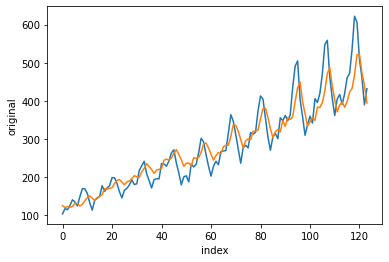

In [44]:
sns.lineplot(data=d,x='index',y='original')#blue originalgraph
sns.lineplot(data=d,x='index',y='fitted')#orange predicted

# Multiple Time Series

In [47]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error
import seaborn as sns 

In [66]:
file='D:\all_stocks_2006-01-01_to_2018-01-01.csv'

In [67]:
data=pd.read_csv(file)

OSError: [Errno 22] Invalid argument: 'D:\x07ll_stocks_2006-01-01_to_2018-01-01.csv'

In [62]:
data.head()

,Month,passengers_in_100_thousands
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data=data[['Date','Close','Name']]

In [65]:
data

,Month,passengers_in_100_thousands
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
multi_ts=data.pivot_table(columns='Name',values='Close',index='Date')

In [ ]:
multi_ts.head()

In [ ]:
multi_ts.tail()

In [ ]:
multi_ts.isna().sum()

In [ ]:
multi_ts.fillna(0,inplace=True)

In [ ]:
multi_ts.columns

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
multi_ts=np.array(multi_ts)

In [ ]:
train_fraction = 0.90

train_size = int(len(multi_ts) * train_fraction)
test_size = len(multi_ts) - train_size
train, test = multi_ts[0:train_size, ], multi_ts[train_size:len(multi_ts), ]

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
scaler.fit(train)

In [ ]:
sd_train=scaler.transform(train)
sd_test=scaler.transform(test)

In [ ]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size ):
        a = dataset[i:(i + window_size),]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, ])
    return(np.array(data_X), np.array(data_Y))

In [ ]:
window_size = 10
train_X, train_Y = create_dataset(sd_train, window_size)
test_X, test_Y = create_dataset(sd_test, window_size)


In [ ]:
train_X.shape,train_Y.shape

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(window_size,31)))
model.add(Dense(50))
model.add(Dense(31))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_Y, epochs=3, batch_size=1, verbose=1,shuffle=False)

In [ ]:
model.summary()

In [ ]:
testPredict = model.predict(test_X)

In [ ]:
testPredict.shape

In [ ]:
# def inverse_transform(data,ymax,ymin):
#     newdata=ymin+data*(ymax-ymin)
#     return(newdata)

In [ ]:
testPredict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform(test_Y)

In [ ]:
import math

testScore = mean_absolute_error(test_Y, testPredict)
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
pd.DataFrame(testPredict)

In [ ]:
test

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
testPredict.shape

In [ ]:
original=np.concatenate([train[:,0],test[:len(testPredict),0]])

In [ ]:
predicted=np.concatenate([train[:,0],testPredict[:,0]])

In [ ]:
d=pd.DataFrame({'original':original,'fitted':predicted,'index':range(len(original))})

In [ ]:
sns.lineplot(data=d,x='index',y='original')
sns.lineplot(data=d,x='index',y='fitted')